# Dataset

In [1]:
# mnist handwritten digits

# Import the Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [5]:
# Load the Dataset

In [6]:
(x_train, y_train),(x_test,y_test) =mnist.load_data()

11490434/11490434 [==============================] - 42s 4us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

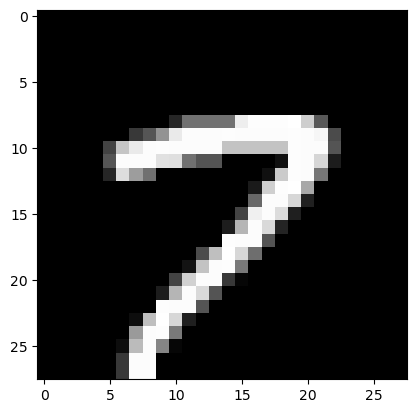

In [13]:
plt.imshow(x_train[123],cmap = 'gray')

In [12]:
y_train[123]

7

In [14]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [15]:
x = np.array([[4,5],[7,8]])

In [17]:
x

array([[4, 5],
       [7, 8]])

In [18]:
x.flatten()

array([4, 5, 7, 8])

# FLATTEN THE DATA

In [20]:
pixels = x_train.shape[1] * x_train.shape[2]
pixels

784

In [21]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train = x_train.reshape(-1 , pixels)
x_train.shape

(60000, 784)

In [24]:
x_test = x_test.reshape(-1, pixels)
x_test.shape

(10000, 784)

# Output Variable Encoding

In [25]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [26]:
y_train_new.shape

(60000, 10)

In [27]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Build the Model

In [30]:
model = Sequential()

#Hidden Layer
model.add(Dense(784, input_shape=(784,), activation = 'relu'))

#Hidden Layer 1
model.add(Dense(512, activation = 'relu'))

#Hidden Layer 2
model.add(Dense(256, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model

In [31]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Train the Model

In [35]:
x_train.shape, y_train_new.shape

((60000, 784), (60000, 10))

In [37]:
model.fit(x_train, y_train_new, epochs = 10, batch_size = 10)

Epoch 1/10


6000/6000 [==============================] - 65s 11ms/step - loss: 0.7839 - accuracy: 0.8986
Epoch 2/10
6000/6000 [==============================] - 65s 11ms/step - loss: 0.2392 - accuracy: 0.9402
Epoch 3/10
6000/6000 [==============================] - 65s 11ms/step - loss: 0.1932 - accuracy: 0.9561
Epoch 4/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.1749 - accuracy: 0.9630
Epoch 5/10
6000/6000 [==============================] - 64s 11ms/step - loss: 0.1778 - accuracy: 0.9633
Epoch 6/10
6000/6000 [==============================] - 64s 11ms/step - loss: 0.1680 - accuracy: 0.9671
Epoch 7/10
6000/6000 [==============================] - 64s 11ms/step - loss: 0.1711 - accuracy: 0.9654
Epoch 8/10
6000/6000 [==============================] - 66s 11ms/step - loss: 0.1712 - accuracy: 0.9672
Epoch 9/10
6000/6000 [==============================] - 64s 11ms/step - loss: 0.1796 - accuracy: 0.9691
Epoch 10/10
6000/6000 [==============================] - 66s 1

# Evaluate on the Test Dataset

In [39]:
model.evaluate(x_test, y_test_new, batch_size = 1)

10000/10000 [==============================] - 14s 1ms/step - loss: 0.3112 - accuracy: 0.9585


[0.31115972995758057, 0.9585000276565552]